In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/swiggy-bangalore/Swiggy Bangalore.csv


# Thank you for watching this notebook!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'../input/swiggy-bangalore/Swiggy Bangalore.csv')
data = pd.DataFrame(df)
data

,Restaurant Name,Category,Rating,Cost for Two (in Rupees),Area,Offer,URL
0,Khichdi Paradise,"Home Food, Desserts, Beverages, Healthy Food",NaN,250,Arekere,NaN,https://www.swiggy.com/restaurants/khichdi-par...
1,Home Plate by EatFit,"North Indian, Home Food, Healthy Food, Indian,...",3.9,160,Arekere,NaN,https://www.swiggy.com/restaurants/home-plate-...
2,THE GRILL & CO.,"Indian, Tandoor, Biryani",NaN,300,Arekere,NaN,https://www.swiggy.com/restaurants/the-grill-a...
3,555 Darjeeling Unique Asian Cuisine,Asian,NaN,300,Arekere,NaN,https://www.swiggy.com/restaurants/555-darjeel...
4,Momo Guy,"Asian, Tibetan, Desserts, Beverages",NaN,200,Arekere,NaN,https://www.swiggy.com/restaurants/momo-guy-jp...
...,...,...,...,...,...,...,...
10292,Holy Chic,Continental,NaN,700,Yeshwanthpur,NaN,https://www.swiggy.com/restaurants/holy-chic-y...
10293,PAPA ROLLS,"North Indian, Chinese",NaN,150,Yeshwanthpur,NaN,https://www.swiggy.com/restaurants/papa-rolls-...
10294,RICE SAMBAR,"South Indian, Chinese",NaN,400,Yeshwanthpur,NaN,https://www.swiggy.com/restaurants/rice-sambar...
10295,Paris Family Restaurant,"Chinese, South Indian, Desserts, Fast Food, Ke...",3.6,400,Yeshwanthpur,NaN,https://www.swiggy.com/restaurants/paris-famil...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10297 entries, 0 to 10296
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Restaurant Name           10297 non-null  object 
 1   Category                  10297 non-null  object 
 2   Rating                    1499 non-null   float64
 3   Cost for Two (in Rupees)  10297 non-null  int64  
 4   Area                      10297 non-null  object 
 5   Offer                     0 non-null      float64
 6   URL                       10297 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 563.2+ KB


In [5]:
data.isnull().sum()

Restaurant Name                 0
Category                        0
Rating                       8798
Cost for Two (in Rupees)        0
Area                            0
Offer                       10297
URL                             0
dtype: int64

# We clean the data (delete unnecessary columns and rows(NaN))

In [6]:
data = data.drop(['URL'], axis = 1)
data = data.drop(['Offer'], axis = 1)
data

,Restaurant Name,Category,Rating,Cost for Two (in Rupees),Area
0,Khichdi Paradise,"Home Food, Desserts, Beverages, Healthy Food",NaN,250,Arekere
1,Home Plate by EatFit,"North Indian, Home Food, Healthy Food, Indian,...",3.9,160,Arekere
2,THE GRILL & CO.,"Indian, Tandoor, Biryani",NaN,300,Arekere
3,555 Darjeeling Unique Asian Cuisine,Asian,NaN,300,Arekere
4,Momo Guy,"Asian, Tibetan, Desserts, Beverages",NaN,200,Arekere
...,...,...,...,...,...
10292,Holy Chic,Continental,NaN,700,Yeshwanthpur
10293,PAPA ROLLS,"North Indian, Chinese",NaN,150,Yeshwanthpur
10294,RICE SAMBAR,"South Indian, Chinese",NaN,400,Yeshwanthpur
10295,Paris Family Restaurant,"Chinese, South Indian, Desserts, Fast Food, Ke...",3.6,400,Yeshwanthpur


In [7]:
data.dropna(axis = 0, inplace = True)
data

,Restaurant Name,Category,Rating,Cost for Two (in Rupees),Area
1,Home Plate by EatFit,"North Indian, Home Food, Healthy Food, Indian,...",3.9,160,Arekere
17,New Kabab Zone,"North Indian, Chinese, Biryani",3.9,250,Arekere
22,Crown Restaurant,"Indian, Chinese",3.7,300,Arekere
30,Thakkali Kitchens,"Kerala, South Indian, Indian, Chinese",3.8,399,Arekere
50,Ishta Cafe - Millet Pizzas,"Pizzas, Salads, Beverages, Healthy Food",3.7,400,Arekere
...,...,...,...,...,...
10226,Sundae Everyday Ice Creams,"Desserts, Ice Cream",3.7,150,Yeshwanthpur
10231,KOLKATA FAMOUS KATI ROLL,"Snacks, Beverages",3.2,99,Yeshwanthpur
10264,Maarish Food Joint,North Indian,3.9,200,Yeshwanthpur
10286,New Punjabi Veg Restaurant,"Chinese, North Indian, Punjabi, Hyderabadi",3.5,150,Yeshwanthpur


# Data ready for processing!

# We will find restaurants with the highest rating, I want to find out the average price per dish (per person)

In [8]:
row = data[data['Rating'] == max(data['Rating'])]
row

,Restaurant Name,Category,Rating,Cost for Two (in Rupees),Area
1,Home Plate by EatFit,"North Indian, Home Food, Healthy Food, Indian,...",3.9,160,Arekere
17,New Kabab Zone,"North Indian, Chinese, Biryani",3.9,250,Arekere
67,KFC,"American, Snacks",3.9,400,Arekere
96,Madras Meal Company,"Chettinad, South Indian",3.9,250,Arekere
112,FreshMenu,"Chinese, Continental, Italian, Mediterranean, ...",3.9,250,Arekere
...,...,...,...,...,...
10106,BOX8 - Desi Meals,"North Indian, Biryani, Fast Food, Desserts",3.9,250,Yeshwanthpur
10141,AJJI PORK HOTEL,"Chinese, South Indian, Biryani",3.9,300,Yeshwanthpur
10170,Kadak Biryani and Grills,"Biryani, Seafood, Andhra, Chinese, Hyderabadi",3.9,350,Yeshwanthpur
10219,Cupcake Bliss Cakes & Desserts,"Bakery, Desserts, Beverages",3.9,200,Yeshwanthpur


# We should rename the columns with the cost so as not to get lost

In [9]:
row = row.rename(columns={"Cost for Two (in Rupees)": "Cost for Two for max rating"})
row

,Restaurant Name,Category,Rating,Cost for Two for max rating,Area
1,Home Plate by EatFit,"North Indian, Home Food, Healthy Food, Indian,...",3.9,160,Arekere
17,New Kabab Zone,"North Indian, Chinese, Biryani",3.9,250,Arekere
67,KFC,"American, Snacks",3.9,400,Arekere
96,Madras Meal Company,"Chettinad, South Indian",3.9,250,Arekere
112,FreshMenu,"Chinese, Continental, Italian, Mediterranean, ...",3.9,250,Arekere
...,...,...,...,...,...
10106,BOX8 - Desi Meals,"North Indian, Biryani, Fast Food, Desserts",3.9,250,Yeshwanthpur
10141,AJJI PORK HOTEL,"Chinese, South Indian, Biryani",3.9,300,Yeshwanthpur
10170,Kadak Biryani and Grills,"Biryani, Seafood, Andhra, Chinese, Hyderabadi",3.9,350,Yeshwanthpur
10219,Cupcake Bliss Cakes & Desserts,"Bakery, Desserts, Beverages",3.9,200,Yeshwanthpur


# Here I create a column with a price for one person

In [10]:
row['Cost for One for max rating'] = row['Cost for Two for max rating'] / 2
row

,Restaurant Name,Category,Rating,Cost for Two for max rating,Area,Cost for One for max rating
1,Home Plate by EatFit,"North Indian, Home Food, Healthy Food, Indian,...",3.9,160,Arekere,80.0
17,New Kabab Zone,"North Indian, Chinese, Biryani",3.9,250,Arekere,125.0
67,KFC,"American, Snacks",3.9,400,Arekere,200.0
96,Madras Meal Company,"Chettinad, South Indian",3.9,250,Arekere,125.0
112,FreshMenu,"Chinese, Continental, Italian, Mediterranean, ...",3.9,250,Arekere,125.0
...,...,...,...,...,...,...
10106,BOX8 - Desi Meals,"North Indian, Biryani, Fast Food, Desserts",3.9,250,Yeshwanthpur,125.0
10141,AJJI PORK HOTEL,"Chinese, South Indian, Biryani",3.9,300,Yeshwanthpur,150.0
10170,Kadak Biryani and Grills,"Biryani, Seafood, Andhra, Chinese, Hyderabadi",3.9,350,Yeshwanthpur,175.0
10219,Cupcake Bliss Cakes & Desserts,"Bakery, Desserts, Beverages",3.9,200,Yeshwanthpur,100.0


# The average price per dish per person in restaurants with a rating of 3.9 is 159.7...

In [11]:
mean_count = np.mean(row['Cost for One for max rating'])
mean_count

159.6987012987013

# I do the same with restaurants with a small rating

# We will find restaurants with a low rating , I want to find out the average price per dish (per person)

In [12]:
row_two = data[data['Rating'] == min(data['Rating'])]
row_two

,Restaurant Name,Category,Rating,Cost for Two (in Rupees),Area
942,New Galaxy Restaurant,"Arabian, Chinese, Indian, Biryani, Combo",3.0,400,Battarahalli
1486,Slurpy Shakes,"Beverages, Ice Cream, Desserts",3.0,150,Central Bangalore
1852,MAGGI BABA,"Beverages, Ice Cream, Continental, Desserts",3.0,250,Central Bangalore
2093,SREE GANESHA FRUITE JUICE CENTER,"Beverages, Snacks, Juices",3.0,50,CV Raman Nagar
2827,D PIZEERIAS'S,"Pizzas, Pastas, Chinese",3.0,300,Geddalahalli
2862,Itminaan Biryani - Dum Pukht,"Biryani, North Indian, Mughlai",3.0,400,Geddalahalli
2920,Kadai restaurant,"Indian, Biryani, Chinese, Tandoor",3.0,150,Geddalahalli
4616,Saapaad,"South Indian, Biryani, Beverages",3.0,150,JP Nagar
5445,Imperio Juice and Cafe,Juices,3.0,250,Kadugodi
5495,Rangamati Bengali Cuisine,Bengali,3.0,300,Kadugodi


In [13]:
row_two = row_two.rename(columns={"Cost for Two (in Rupees)": "Cost for Two for min rating"})
row_two

,Restaurant Name,Category,Rating,Cost for Two for min rating,Area
942,New Galaxy Restaurant,"Arabian, Chinese, Indian, Biryani, Combo",3.0,400,Battarahalli
1486,Slurpy Shakes,"Beverages, Ice Cream, Desserts",3.0,150,Central Bangalore
1852,MAGGI BABA,"Beverages, Ice Cream, Continental, Desserts",3.0,250,Central Bangalore
2093,SREE GANESHA FRUITE JUICE CENTER,"Beverages, Snacks, Juices",3.0,50,CV Raman Nagar
2827,D PIZEERIAS'S,"Pizzas, Pastas, Chinese",3.0,300,Geddalahalli
2862,Itminaan Biryani - Dum Pukht,"Biryani, North Indian, Mughlai",3.0,400,Geddalahalli
2920,Kadai restaurant,"Indian, Biryani, Chinese, Tandoor",3.0,150,Geddalahalli
4616,Saapaad,"South Indian, Biryani, Beverages",3.0,150,JP Nagar
5445,Imperio Juice and Cafe,Juices,3.0,250,Kadugodi
5495,Rangamati Bengali Cuisine,Bengali,3.0,300,Kadugodi


In [14]:
row_two['Cost for One for min rating'] = row_two['Cost for Two for min rating'] / 2
row_two

,Restaurant Name,Category,Rating,Cost for Two for min rating,Area,Cost for One for min rating
942,New Galaxy Restaurant,"Arabian, Chinese, Indian, Biryani, Combo",3.0,400,Battarahalli,200.0
1486,Slurpy Shakes,"Beverages, Ice Cream, Desserts",3.0,150,Central Bangalore,75.0
1852,MAGGI BABA,"Beverages, Ice Cream, Continental, Desserts",3.0,250,Central Bangalore,125.0
2093,SREE GANESHA FRUITE JUICE CENTER,"Beverages, Snacks, Juices",3.0,50,CV Raman Nagar,25.0
2827,D PIZEERIAS'S,"Pizzas, Pastas, Chinese",3.0,300,Geddalahalli,150.0
2862,Itminaan Biryani - Dum Pukht,"Biryani, North Indian, Mughlai",3.0,400,Geddalahalli,200.0
2920,Kadai restaurant,"Indian, Biryani, Chinese, Tandoor",3.0,150,Geddalahalli,75.0
4616,Saapaad,"South Indian, Biryani, Beverages",3.0,150,JP Nagar,75.0
5445,Imperio Juice and Cafe,Juices,3.0,250,Kadugodi,125.0
5495,Rangamati Bengali Cuisine,Bengali,3.0,300,Kadugodi,150.0


# The average price per dish per person in restaurants with a 3.0 rating is 140...

In [15]:
mean_count_two = np.mean(row_two['Cost for One for min rating'])
mean_count_two

140.46666666666667

In [16]:
data['Cost for one'] = data['Cost for Two (in Rupees)'] / 2
data

,Restaurant Name,Category,Rating,Cost for Two (in Rupees),Area,Cost for one
1,Home Plate by EatFit,"North Indian, Home Food, Healthy Food, Indian,...",3.9,160,Arekere,80.0
17,New Kabab Zone,"North Indian, Chinese, Biryani",3.9,250,Arekere,125.0
22,Crown Restaurant,"Indian, Chinese",3.7,300,Arekere,150.0
30,Thakkali Kitchens,"Kerala, South Indian, Indian, Chinese",3.8,399,Arekere,199.5
50,Ishta Cafe - Millet Pizzas,"Pizzas, Salads, Beverages, Healthy Food",3.7,400,Arekere,200.0
...,...,...,...,...,...,...
10226,Sundae Everyday Ice Creams,"Desserts, Ice Cream",3.7,150,Yeshwanthpur,75.0
10231,KOLKATA FAMOUS KATI ROLL,"Snacks, Beverages",3.2,99,Yeshwanthpur,49.5
10264,Maarish Food Joint,North Indian,3.9,200,Yeshwanthpur,100.0
10286,New Punjabi Veg Restaurant,"Chinese, North Indian, Punjabi, Hyderabadi",3.5,150,Yeshwanthpur,75.0


# You can see that the correlation is 0, you can download that the price does not depend on the rating of the restaurant

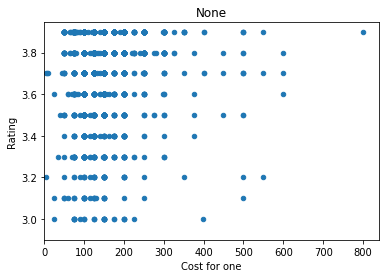

In [17]:
data.plot(x ='Cost for one', y='Rating', kind='scatter'),
plt.ylim(ymin = 2.9)
plt.xlim(xmin = 0)
plt.title("None")
plt.xlabel("Cost for one")
plt.ylabel("Rating")
plt.show()

# Correct me if necessary, I would also be grateful if you vote for my notebook. Thank you, I'm eating!